In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from fitTools.Resonator import Resonator
from utilities import *

### data discription:
FFL power sweeps

    FFL drive power from -5 50 5 dBm with 1 dBm step size, extra 20 dB attenuation (fixed), and 8 or 10 dB insertion loss from DA
    readout power attenuation from 13 to 50 dB
    readout power -27 dBm
    flux bias = 50 uA, FFL drive at 3.8 GHz

In [6]:
with h5py.File(datapath + f_name, 'r') as hf:
    print(hf)
    h5_tree(hf)

<HDF5 file "diss08_07A_FFLspec_powersweeps.hdf5" (mode r)>
├── Channels (53)
├── Data
│   ├── Channel names (2)
│   ├── Data (20)
│   └── Time stamp (11)
├── Instrument config
│   ├── Agilent Network Analyzer - GPIB: 19,  at localhost
│   ├── Keithley 2400 SourceMeter - GPIB: 24, Vikram at localhost
│   ├── SignalCore SC5511A Signal Generator - , 1000334C at localhost
│   ├── Vaunix Lab Brick Digital Attenuator - USB: 24679,  at localhost
│   └── Vaunix Lab Brick Digital Attenuator - USB: 26776, readout attenuator at localhost
├── Instruments (5)
├── Log list (1)
├── Settings
├── Step config
│   ├── 1000334C - Frequency
│   │   ├── Optimizer
│   │   ├── Relation parameters (1)
│   │   └── Step items (1)
│   ├── 1000334C - Power
│   │   ├── Optimizer
│   │   ├── Relation parameters (1)
│   │   └── Step items (1)
│   └── readout attenuator - Attenuation
│       ├── Optimizer
│       ├── Relation parameters (1)
│       └── Step items (1)
├── Step list (3)
├── Tags
└── Traces
    ├── Agile

# drive on

In [77]:
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0228\\'
f_name = 'diss08_07A_FFLspec_powersweeps_2.hdf5'
f = h5py.File(datapath + f_name,'r')

In [78]:
s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]


freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #two VNA values
pdrive = np.linspace(5,-5,11)
preadout = np.linspace(13,50,20)

In [79]:
s21_complex = (s21[:,0,:]+1j*s21[:,1,:])[:,0:11*20]
print(np.shape(s21_complex))
qvals=np.zeros((11, 20))
qvalext=np.zeros((11, 20))
fit_is_good = np.full((11, 20), False)

(800, 220)


In [84]:
for i in range(11):
    for j in range(20):
        # mindex=np.argmin(np.abs(s21_complex[:,i * 20 + j]))
        # res = Resonator(port_type='notch',f_data=freqs[mindex-100:mindex+40],z_data=s21_complex[mindex-100:mindex+40,i*20+j])
        res = Resonator(port_type='notch', f_data=freqs,z_data=s21_complex[:, 20 * i + j])
        res.autofit()
        #res.show()
        if res.fit_found:
            qvals[i,j] = res.Qi
            qvalext[i,j] = res.Qc
            fit_is_good[i,j] = True

fit error = [1.20293238e-04 2.38446837e+01 3.81879271e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [9.13575546e+10 1.11727510e+12 1.80895782e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-2.53764914e+16  1.09376263e+15  3.47653357e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [-3.39907573e+07  1.00318294e+05  5.24227262e+10]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [3.14768000e-04 1.34693653e+02 2.68142218e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
fit error = [5.98025585e+12 2.46755788e+13 4.99673024e+25]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))


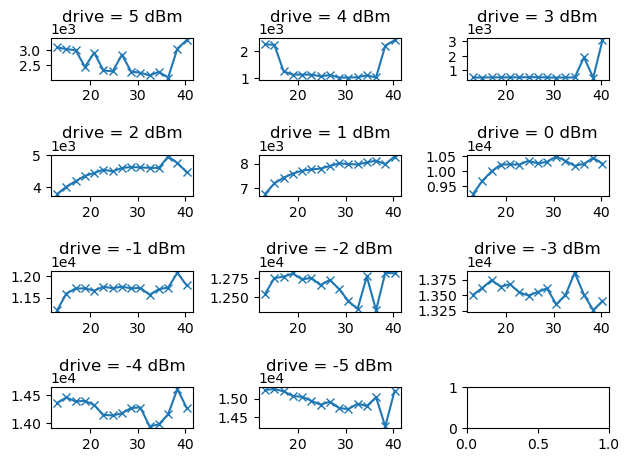

In [85]:
fig, axes = plt.subplots(4,3)
for i in range(11):
    axes[int(np.floor(i/3)), i%3].plot(preadout[:15], qvals[i,:15], '-x')
    axes[int(np.floor(i/3)), i%3].set_title(f'drive = {int(pdrive[i])} dBm', y= 1.2)
    axes[int(np.floor(i/3)), i%3].ticklabel_format(axis='y', style='sci', scilimits=(-1,0))
plt.tight_layout()


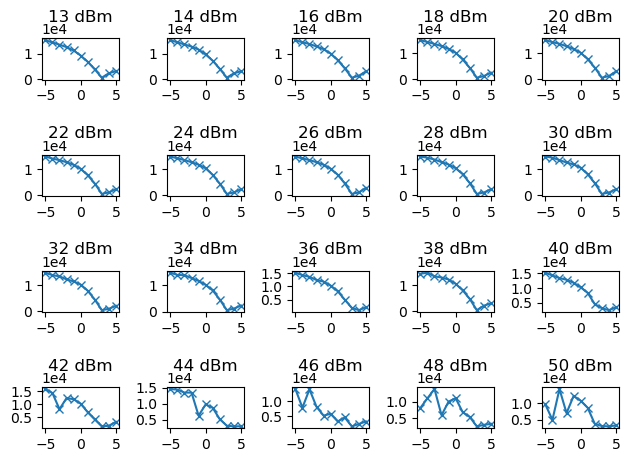

In [86]:
fig, axes = plt.subplots(4,5)
for i in range(20):
    axes[int(np.floor(i/5)), i%5].plot(pdrive, qvals[:,i], '-x')
    axes[int(np.floor(i/5)), i%5].set_title(f'{int(preadout[i])} dBm', y=1.2)
    axes[int(np.floor(i/5)), i%5].ticklabel_format(axis='y', style='sci', scilimits=(-1,0))
plt.tight_layout()

# drive off

In [3]:
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0228\\'
f_name = 'diss08_07A_FFLspec_powersweeps.hdf5'
f = h5py.File(datapath + f_name,'r')


In [8]:
s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]


freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #two VNA values
pdrive = np.linspace(5,-5,11)
preadout = np.linspace(13,50,20)

In [12]:
s21_complex = (s21[:,0,:]+1j*s21[:,1,:])[:,0:11*20]
print(np.shape(s21_complex))
qvals=np.zeros((11, 20))
qvalext=np.zeros((11, 20))
fit_is_good = np.full((11, 20), False)

(800, 220)


In [21]:
for i in range(11):
    for j in range(20):
        # mindex=np.argmin(np.abs(s21_complex[:,i]))
        # res = Resonator(port_type='notch',f_data=freqs[mindex-100:mindex+40],z_data=s21_complex[mindex-100:mindex+40,i])
        res = Resonator(port_type='notch', f_data=freqs,z_data=s21_complex[:, 20 * i + j])
        res.autofit()
        #res.show()
        if res.fit_found:
            qvals[i,j] = res.Qi
            qvalext[i,j] = res.Qc
            fit_is_good[i,j] = True

In [24]:
np.all(fit_is_good)

True

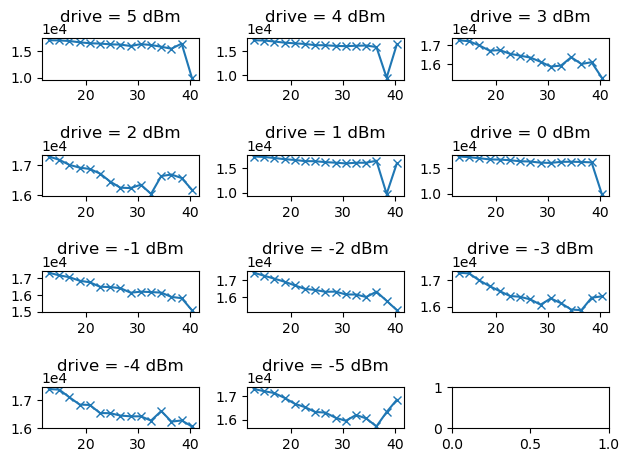

In [62]:
fig, axes = plt.subplots(4,3)
for i in range(11):
    axes[int(np.floor(i/3)), i%3].plot(preadout[:15], qvals[i,:15], '-x')
    axes[int(np.floor(i/3)), i%3].set_title(f'drive = {int(pdrive[i])} dBm', y= 1.2)
    axes[int(np.floor(i/3)), i%3].ticklabel_format(axis='y', style='sci', scilimits=(-1,0))
plt.tight_layout()


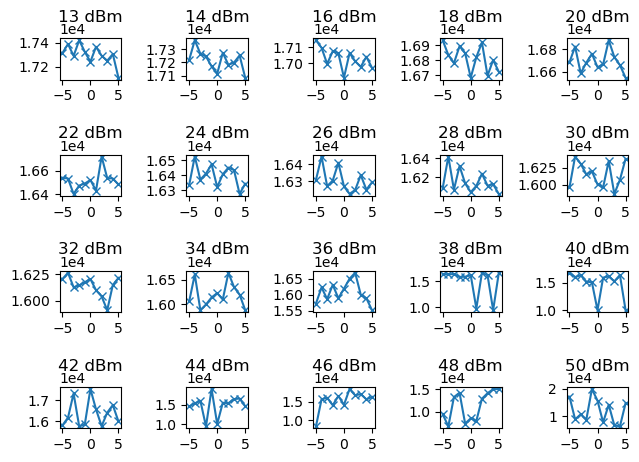

In [63]:
fig, axes = plt.subplots(4,5)
for i in range(20):
    axes[int(np.floor(i/5)), i%5].plot(pdrive, qvals[:,i], '-x')
    axes[int(np.floor(i/5)), i%5].set_title(f'{int(preadout[i])} dBm', y=1.2)
    axes[int(np.floor(i/5)), i%5].ticklabel_format(axis='y', style='sci', scilimits=(-1,0))
plt.tight_layout()

# closer to punchout

In [87]:
datapath3 = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0228\\'
f_name3 = 'diss08_07A_FFLspec_sweepROpower_12.hdf5'
f3 = h5py.File(datapath + f_name,'r')

In [ ]:
s21 = f3['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f3['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f3['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]


freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #two VNA values
pdrive = np.linspace(-25,-10,16)
preadout = np.linspace(30,50,11)